In [1]:
import fastai
import torch
from fastai.vision.all import *
from ipywidgets import widgets
from PIL import Image
import seaborn as sns

In [2]:
# Path
path = Path("/kaggle/input/cats-in-the-wild-image-classification")
fls = get_image_files(path)

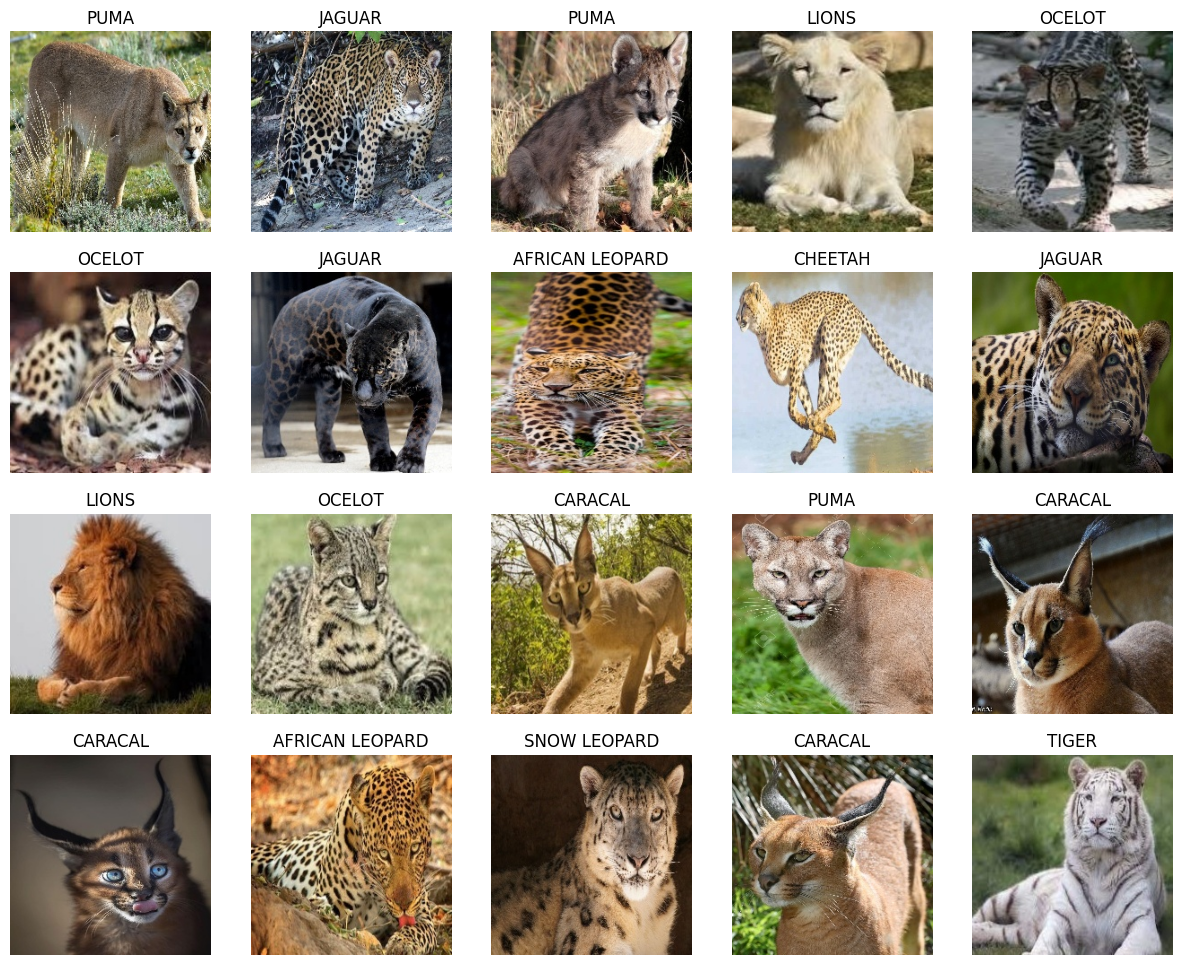

In [3]:
results = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=30),
    get_y = parent_label,
    item_tfms=Resize(224)
)

# Data loader
dls = results.dataloaders(path)

# check dataset
dls.train.show_batch(max_n=20, nrows=4)

In [6]:
# Learn & Train
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.710715,0.299304,0.921971,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.315118,0.225762,0.932238,00:06
1,0.201086,0.242068,0.930185,00:06
2,0.127331,0.215102,0.944559,00:07
3,0.078828,0.227267,0.942505,00:07
4,0.046851,0.216198,0.944559,00:06


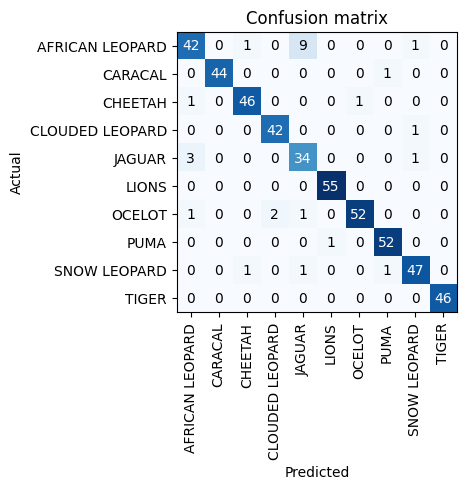

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

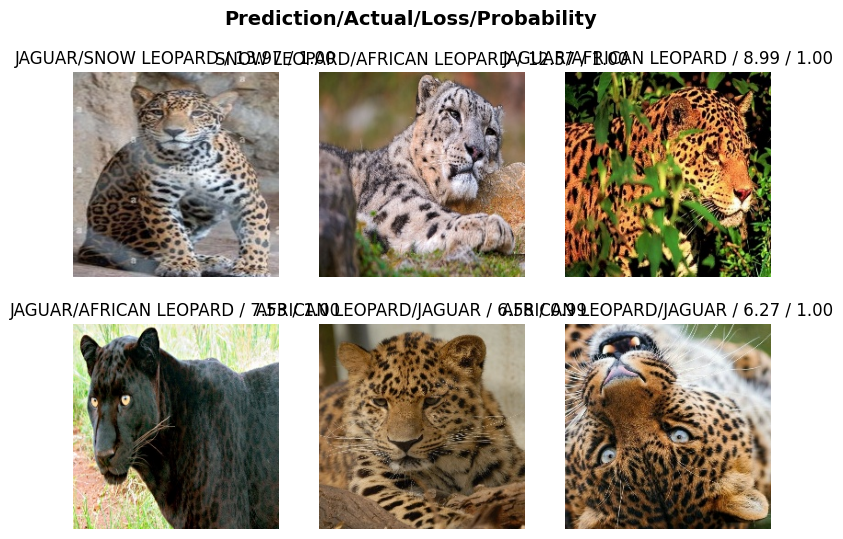

In [8]:
# Top Losses
interp.plot_top_losses(6, nrows=2)

In [9]:
torch.save(learn, 'model.pkl')